<a href="https://colab.research.google.com/github/ViejoLoco27/Challenge_TelecomX/blob/main/Telecom__Exploratory_Data__Aanalysis__(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telecom X:Exploratory Data Aanalysis(EDA)

In [1]:
import pandas as pd
pd.options.mode.copy_on_write = True
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
datos_origen_servicios = pd.read_json('/content/TelecomX_servicios.json')
datos_origen_servicios.head()

,churn,tenure,servicio_telefonico,multiples_lineas,servicio_internet,seguridad_online,servicio_nube,proteccion_dispositivos,soporte_tecnico,tv_satelital,streaming_peliculas,pago_mensual
0,0,9,1,0,0,0,1,0,1,1,0,65.6
1,0,9,1,1,0,0,0,0,0,0,1,59.9
2,1,4,1,0,1,0,0,1,0,0,0,73.9
3,1,13,1,0,1,0,1,1,0,1,1,98.0
4,1,3,1,0,1,0,0,0,1,1,0,83.9


In [3]:
#datos_estatus_usuarios.loc[:, 'metodo_de_pago'] = datos_estatus_usuarios.loc[:,'metodo_de_pago'].replace({'mailed check':'manual',
#                                                                                'electronic check':'manual','credit card (automatic)':'automatico','bank transfer (automatic)':'automatico'})
datos_origen_servicios = datos_origen_servicios.rename(columns={'churn':'cancelacion','tenure':'permanencia_mensual'})

In [4]:
lista_encabezados = datos_origen_servicios.columns.tolist() # Encabezados de listas
lista_encabezados

['cancelacion',
 'permanencia_mensual',
 'servicio_telefonico',
 'multiples_lineas',
 'servicio_internet',
 'seguridad_online',
 'servicio_nube',
 'proteccion_dispositivos',
 'soporte_tecnico',
 'tv_satelital',
 'streaming_peliculas',
 'pago_mensual']

In [5]:
datos_origen_servicios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4832 entries, 0 to 4831
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cancelacion              4832 non-null   int64  
 1   permanencia_mensual      4832 non-null   int64  
 2   servicio_telefonico      4832 non-null   int64  
 3   multiples_lineas         4832 non-null   int64  
 4   servicio_internet        4832 non-null   int64  
 5   seguridad_online         4832 non-null   int64  
 6   servicio_nube            4832 non-null   int64  
 7   proteccion_dispositivos  4832 non-null   int64  
 8   soporte_tecnico          4832 non-null   int64  
 9   tv_satelital             4832 non-null   int64  
 10  streaming_peliculas      4832 non-null   int64  
 11  pago_mensual             4832 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 490.8 KB


In [6]:
pd.DataFrame(datos_origen_servicios['pago_mensual'].describe()) # Estadística descriptiva

,pago_mensual
count,4832.000000
mean,81.761207
std,18.306134
min,42.900000
25%,69.787500
50%,82.500000
75%,95.700000
max,118.750000


In [7]:
columnas_servicios = ['servicio_telefonico','multiples_lineas','servicio_internet','seguridad_online','servicio_nube','proteccion_dispositivos','soporte_tecnico','tv_satelital','streaming_peliculas']

In [8]:
datos_origen_servicios['total_servicios']=datos_origen_servicios[columnas_servicios].sum(axis=1) # Nueva columna
datos_origen_servicios.head()

,cancelacion,permanencia_mensual,servicio_telefonico,multiples_lineas,servicio_internet,seguridad_online,servicio_nube,proteccion_dispositivos,soporte_tecnico,tv_satelital,streaming_peliculas,pago_mensual,total_servicios
0,0,9,1,0,0,0,1,0,1,1,0,65.6,4
1,0,9,1,1,0,0,0,0,0,0,1,59.9,3
2,1,4,1,0,1,0,0,1,0,0,0,73.9,3
3,1,13,1,0,1,0,1,1,0,1,1,98.0,6
4,1,3,1,0,1,0,0,0,1,1,0,83.9,4


In [9]:
servicios = datos_origen_servicios.copy()
servicios.head(3)

,cancelacion,permanencia_mensual,servicio_telefonico,multiples_lineas,servicio_internet,seguridad_online,servicio_nube,proteccion_dispositivos,soporte_tecnico,tv_satelital,streaming_peliculas,pago_mensual,total_servicios
0,0,9,1,0,0,0,1,0,1,1,0,65.6,4
1,0,9,1,1,0,0,0,0,0,0,1,59.9,3
2,1,4,1,0,1,0,0,1,0,0,0,73.9,3


<Figure size 1200x600 with 0 Axes>

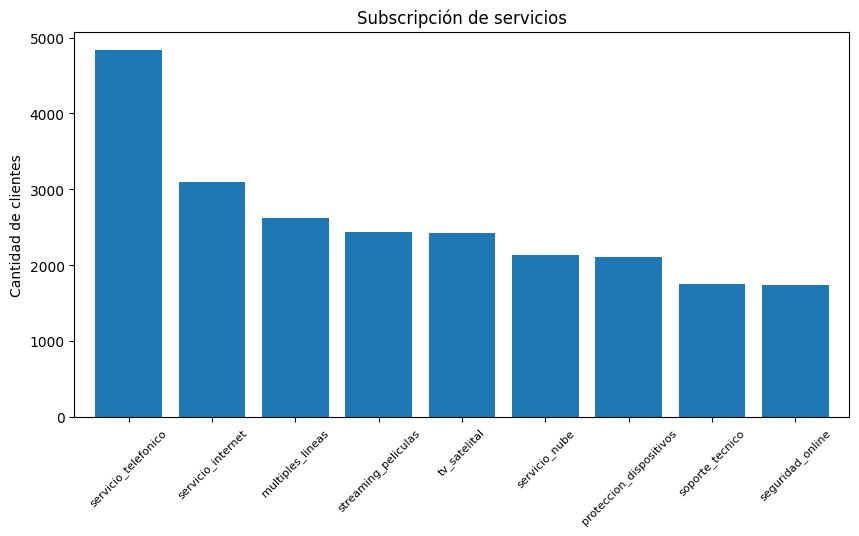

In [29]:
suma_servicios = pd.DataFrame(servicios[columnas_servicios].sum()).sort_values(by=0, ascending=False)
suma_servicios.plot(kind='bar',legend=False,figsize=(10,5),width=0.8)
plt.xlabel('')
plt.ylabel('Cantidad de clientes')
plt.title('Subscripción de servicios')
plt.xticks(rotation=45, fontsize=8)
plt.show()

In [11]:
estratos = [0,3,6,9] # Estratos: <=3, 4-6, 7-9
etiquetas = ['bajo','medio','alto'] # Etiquetas
servicios['consumo_cliente'] = pd.cut(servicios['total_servicios'], bins=estratos, labels=etiquetas)#pd.cut -> asigna la categoría correspondiente a cada columna

In [12]:
servicios.head()

,cancelacion,permanencia_mensual,servicio_telefonico,multiples_lineas,servicio_internet,seguridad_online,servicio_nube,proteccion_dispositivos,soporte_tecnico,tv_satelital,streaming_peliculas,pago_mensual,total_servicios,consumo_cliente
0,0,9,1,0,0,0,1,0,1,1,0,65.6,4,medio
1,0,9,1,1,0,0,0,0,0,0,1,59.9,3,bajo
2,1,4,1,0,1,0,0,1,0,0,0,73.9,3,bajo
3,1,13,1,0,1,0,1,1,0,1,1,98.0,6,medio
4,1,3,1,0,1,0,0,0,1,1,0,83.9,4,medio


In [13]:
consumo = pd.DataFrame(servicios['consumo_cliente'].value_counts())
consumo

,count
consumo_cliente,
medio,2399
bajo,1400
alto,1033


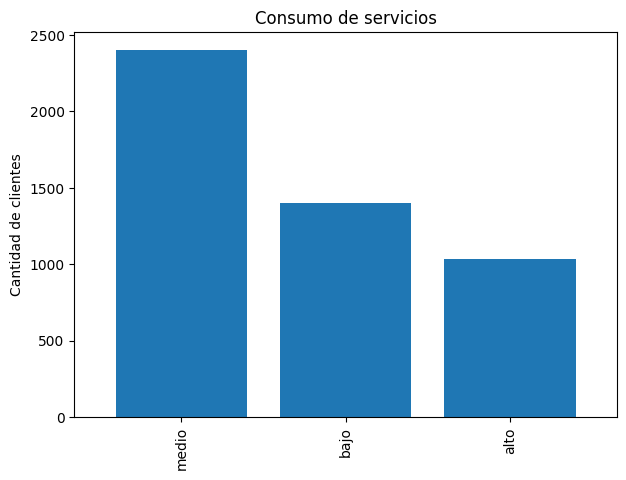

In [50]:
consumo.plot(kind='bar', legend=False, figsize=(7,5), width=0.8)
plt.xlabel('')
plt.ylabel('Cantidad de clientes')
plt.title('Consumo de servicios')
plt.show()

In [15]:
permanencia_consumo = servicios[[
 'permanencia_mensual',
 'pago_mensual',
 'total_servicios',
 'consumo_cliente']]
permanencia_consumo

,permanencia_mensual,pago_mensual,total_servicios,consumo_cliente
0,9,65.60,4,medio
1,9,59.90,3,bajo
2,4,73.90,3,bajo
3,13,98.00,6,medio
4,3,83.90,4,medio
...,...,...,...,...
4827,1,70.15,2,bajo
4828,13,55.15,3,bajo
4829,22,85.10,4,medio
4830,2,50.30,2,bajo


In [16]:
query1_permanencia_consumo = pd.DataFrame(round(permanencia_consumo.groupby('consumo_cliente')['permanencia_mensual'].mean(),2))
query1_permanencia_consumo['permanencia_en_meses']=pd.DataFrame(permanencia_consumo.groupby('consumo_cliente')['permanencia_mensual'].sum())
query1_permanencia_consumo['porcentaje_permanencia'] = round((query1_permanencia_consumo['permanencia_en_meses'] / permanencia_consumo['permanencia_mensual'].sum()) * 100, 2)
query1_permanencia_consumo['gasto_mensual'] = round(permanencia_consumo.groupby('consumo_cliente')['pago_mensual'].mean(),2)
query1_permanencia_consumo

<ipython-input-16-7d6043e0a7eb>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  query1_permanencia_consumo = pd.DataFrame(round(permanencia_consumo.groupby('consumo_cliente')['permanencia_mensual'].mean(),2))
<ipython-input-16-7d6043e0a7eb>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  query1_permanencia_consumo['permanencia_en_meses']=pd.DataFrame(permanencia_consumo.groupby('consumo_cliente')['permanencia_mensual'].sum())
<ipython-input-16-7d6043e0a7eb>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain c

,permanencia_mensual,permanencia_en_meses,porcentaje_permanencia,gasto_mensual
consumo_cliente,,,,
bajo,13.77,19281,12.07,62.42
medio,33.78,81038,50.73,84.20
alto,57.51,59411,37.19,102.30


In [17]:
query1_permanencia_consumo = query1_permanencia_consumo.rename(columns={'permanencia_mensual':'permanencia_promedio',	'permanencia_en_meses':'total_meses_permanencia',	'porcentaje_permanencia':'distribución %',	'gasto_mensual':'gasto_mensual_promedio',})
query1_permanencia_consumo

,permanencia_promedio,total_meses_permanencia,distribución %,gasto_mensual_promedio
consumo_cliente,,,,
bajo,13.77,19281,12.07,62.42
medio,33.78,81038,50.73,84.20
alto,57.51,59411,37.19,102.30


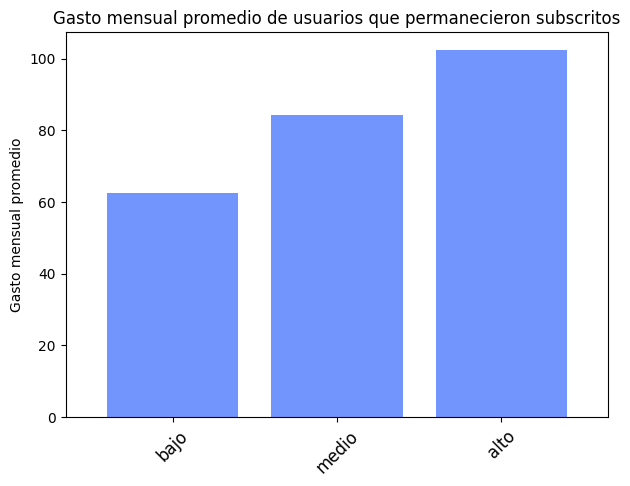

In [63]:
query1_permanencia_consumo['gasto_mensual_promedio'].plot(kind='bar',color='#7195FD',legend=False,figsize=(7,5),width=0.8)
plt.xlabel('')
plt.ylabel('Gasto mensual promedio')
plt.title('Gasto mensual promedio de usuarios que permanecieron subscritos')
plt.xticks(rotation=45, fontsize=12)
plt.show()

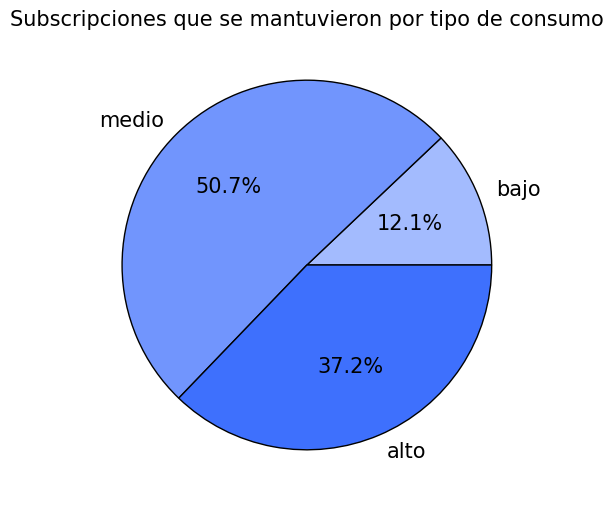

In [67]:
query1_permanencia_consumo['distribución %'].plot(kind='pie',autopct='%1.1f%%',colors=['#A3BBFE','#7195FD','#3E70FD'],
                                                  wedgeprops={'edgecolor': 'black', 'linewidth': 1},
                                                  legend=False,textprops={'fontsize': 15} ,figsize=(6,6))
plt.title('Subscripciones que se mantuvieron por tipo de consumo',fontsize=15)
plt.ylabel('')  # Para eliminar la etiqueta del eje Y
plt.show()


In [18]:
cancelacion_consumo = servicios[[
 'cancelacion',
 'pago_mensual',
 'total_servicios',
 'consumo_cliente']]
cancelacion_consumo = cancelacion_consumo.loc[cancelacion_consumo['cancelacion'] != 0]
cancelacion_consumo

,cancelacion,pago_mensual,total_servicios,consumo_cliente
2,1,73.90,3,bajo
3,1,98.00,6,medio
4,1,83.90,4,medio
15,1,62.70,4,medio
16,1,94.10,6,medio
...,...,...,...,...
4814,1,79.45,4,medio
4818,1,96.80,5,medio
4819,1,83.85,4,medio
4827,1,70.15,2,bajo


In [19]:
query1_cancelacion_consumo = pd.DataFrame(round(cancelacion_consumo.groupby('consumo_cliente')['cancelacion'].sum(),2))
query1_cancelacion_consumo['porcentaje_cancelacion'] = round((query1_cancelacion_consumo['cancelacion'] / cancelacion_consumo['cancelacion'].sum()) * 100, 2)
query1_cancelacion_consumo['gasto_mensual'] = round(cancelacion_consumo.groupby('consumo_cliente')['pago_mensual'].mean(),2)
query1_cancelacion_consumo

<ipython-input-19-48d5054ad762>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  query1_cancelacion_consumo = pd.DataFrame(round(cancelacion_consumo.groupby('consumo_cliente')['cancelacion'].sum(),2))
<ipython-input-19-48d5054ad762>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  query1_cancelacion_consumo['gasto_mensual'] = round(cancelacion_consumo.groupby('consumo_cliente')['pago_mensual'].mean(),2)


,cancelacion,porcentaje_cancelacion,gasto_mensual
consumo_cliente,,,
bajo,604,38.08,66.02
medio,783,49.37,88.90
alto,199,12.55,105.33


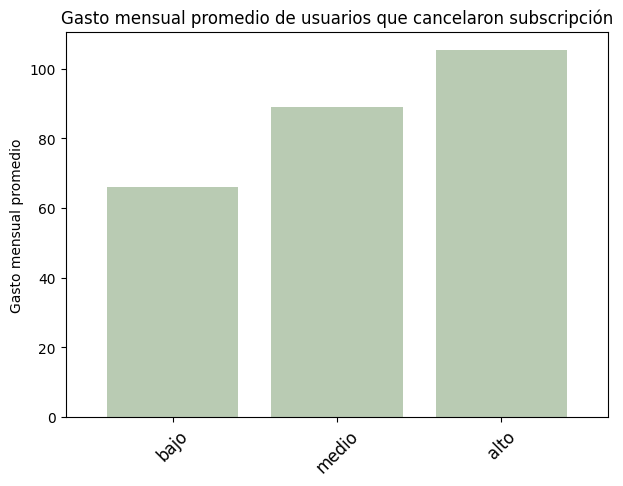

In [64]:
query1_cancelacion_consumo['gasto_mensual'].plot(kind='bar',color='#B9CBB3',legend=False,figsize=(7,5),width=0.8)
plt.xlabel('')
plt.ylabel('Gasto mensual promedio')
plt.title('Gasto mensual promedio de usuarios que cancelaron subscripción')
plt.xticks(rotation=45, fontsize=12)
plt.show()

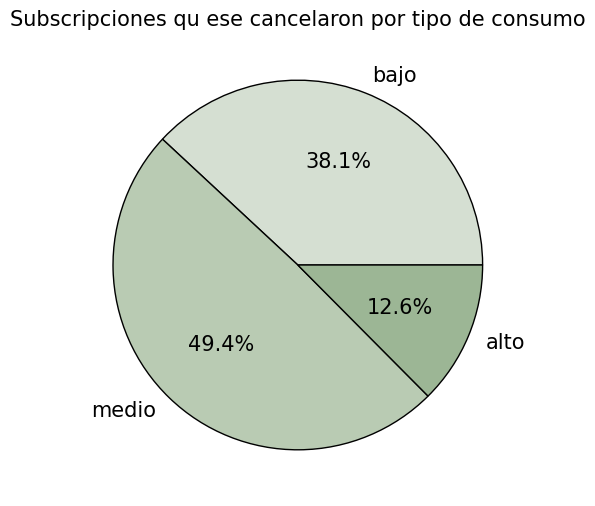

In [68]:
query1_cancelacion_consumo['porcentaje_cancelacion'].plot(kind='pie',autopct='%1.1f%%',colors=['#D5DFD2','#B9CBB3','#9CB695'],
                                                  wedgeprops={'edgecolor': 'black', 'linewidth': 1},
                                                  legend=False,textprops={'fontsize': 15} ,figsize=(6,6))
plt.title('Subscripciones qu ese cancelaron por tipo de consumo',fontsize=15)
plt.ylabel('')  # Para eliminar la etiqueta del eje Y
plt.show()


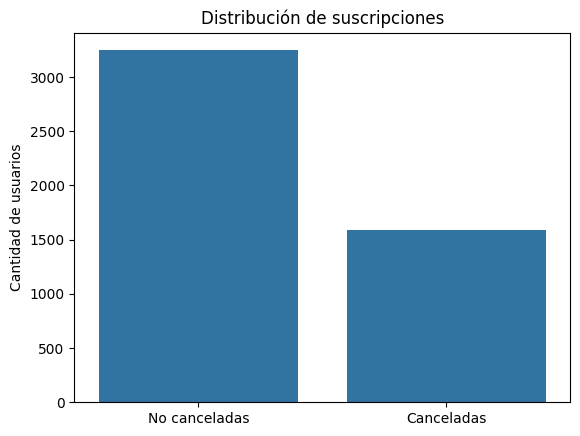

In [20]:
conteo_cancelacion = servicios['cancelacion'].value_counts()

# Graficar con Seaborn
sns.barplot(x=conteo_cancelacion.index, y=conteo_cancelacion.values)
plt.xlabel('')
plt.ylabel('Cantidad de usuarios')
plt.title('Distribución de suscripciones')
plt.xticks([0, 1], ['No canceladas', 'Canceladas'])
plt.show()